In [3]:
%cd ..
%mkdir /project/
%cd /project

/
/project


In [4]:
!pip install --upgrade --force-reinstall --no-deps kaggle

# set kaggle json dir
import os
#Personal example
os.environ['KAGGLE_CONFIG_DIR'] = "/project/.kaggle"
os.environ['KAGGLE_USERNAME'] = "spregler"
os.environ['KAGGLE_KEY'] = "XXXX"

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=284bf3020b463292a61d011ca168064fdbf7b37fa4b85b2e44f2d72ad0dced85
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [5]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 98% 760M/779M [00:11<00:00, 46.9MB/s]
100% 779M/779M [00:11<00:00, 71.4MB/s]


In [6]:
!unzip plant-pathology-2020-fgvc7

Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: images/Test_1019.jpg    
  inflati

In [0]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 1.2MB/s eta 0:00:01

In [18]:
!pip install neptune-client
!pip install neptune-contrib
!pip install neptune-contrib[monitoring]

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 829kB 10.5MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 204kB 56.7MB/s 
     |████████████████████████████████| 460kB 40.6MB/s 
     |████████████████████████████████| 143kB 60.4MB/s 
     |████████████████████████████████| 92kB 12.1MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.4.114-py2.py3-none-any.whl size=148704 sha256=9e1cae5f0784ef2602d359b1f90d8b26af99ea1093e35025411417e893bc3ae0
  Stored in directory: /root/.cache/pip/wheels/ba/41/1a/1806e19dac1b8b819177b13066fbb4d4a6f4446850021c0447
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=0256bc0a7ddd940f5f87b713670fc3768e999d4f64e0e1a168574a9367b8c0df
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a

In [13]:
import neptune

neptune.init(
    api_token='XXXX',
    project_qualified_name='spregler/fastai'
)

Project(spregler/fastai)

In [12]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 4.0MB 50.2MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu May 28 14:30:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os 
from pathlib import Path

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import fastai
import fastai.vision
from fastai import *
from fastai.vision import *
from fastai.vision import learner
from sklearn.metrics import *

import pandas as pd
import numpy as np

root_dir = Path("/project/") # Local path object in colab
train_df = pd.read_csv('/project/train.csv')
test_df = pd.read_csv("/project/test.csv")
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [69]:
test_data = ImageList.from_df(test_df, root_dir, folder='images', suffix='.jpg')
test_data

ImageList (1821 items)
Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048)
Path: /project

In [0]:
def transformPipeline(df):
  # Creates a class column and assign it to the index which produces the max value for each row
  df['class'] = np.argmax(train_df.loc[:, ['healthy','multiple_diseases','rust','scab']].values, axis=1)
  # Drops columnns that are no longer of use
  df.drop(columns=['healthy','multiple_diseases','rust','scab'], inplace=True)
  print("Transformed df: ")
  print(train_df.head())

Transformed df: 
  image_id  class
0  Train_0      3
1  Train_1      1
2  Train_2      0
3  Train_3      2
4  Train_4      0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2b7616cf8>]], dtype=object)

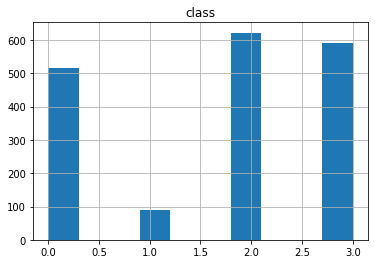

In [5]:
transformPipeline(train_df)
train_df.hist() # we have imbalanced data!

In [0]:
seed = np.random.seed(42)
src = (ImageList.from_df(train_df, root_dir, folder='images', suffix='.jpg')
       .split_by_rand_pct(seed=seed)
       .label_from_df()
       .add_test(test_data))

tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.5, max_rotate=90.0)

data = (src.transform(tfms, size=256)
      .databunch(bs=64)
      .normalize(imagenet_stats))

In [63]:
data

ImageDataBunch;

Train: LabelList (1457 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
3,1,0,2,0
Path: /project;

Valid: LabelList (364 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
2,0,0,2,0
Path: /project;

Test: LabelList (1821 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /project

In [0]:
from sklearn.metrics import roc_auc_score

def auroc_score(input, target):
    input, target = input.cpu().numpy(), target.cpu().numpy()
    return roc_auc_score(input, target)

@dataclass
class AUC(Callback):
    clas:int=1
    _order = -30
    
    def __init__(self, clas, **kwargs):
        super().__init__()
        self.clas = clas
        self.temp_list = ["healthy", "multiple_diseases", "rust", "scab"]
        self.name = "auc_" + str(self.temp_list[self.clas])
        self.roc = 0
    
    def on_epoch_begin(self, **kwargs):
        self.output, self.target = [], []
    
    def on_batch_end(self, last_output, last_target, train, **kwargs):
        if not train:
            self.output.append(last_output)
            self.target.append(last_target)
    def on_epoch_end(self, last_metrics, **kwargs):
        if len(self.output) > 0:
            output = torch.cat(self.output)
            target = torch.cat(self.target)
            considered_clas = self.clas
            indexes = (target == considered_clas)
            target_for_roc = torch.zeros(target.size())
            target_for_roc[indexes] = 1
            probs = F.softmax(output, dim = 1)
            pfinal = probs[:, considered_clas]
            self.metric = auroc_score(target_for_roc, pfinal)
            self.roc = self.metric
        return add_metrics(last_metrics, self.metric)


class MeanAUC(Callback):
    _order = -20
    
    def __init__(self, auc0, auc1, auc2, auc3):
        super().__init__()
        self.name = "Mean AUC"
        self.auc0 = auc0
        self.auc1 = auc1
        self.auc2 = auc2
        self.auc3 = auc3
    
    def on_epoch_end(self, last_metrics, **kwargs):
        return add_metrics(last_metrics, (self.auc0.roc + self.auc1.roc + self.auc2.roc + self.auc3.roc) / 4)

In [15]:
from fastai.callbacks import *
from neptunecontrib.monitoring.fastai import NeptuneMonitor

auc0 = AUC(clas=0)
auc1 = AUC(clas=1)
auc2 = AUC(clas=2)
auc3 = AUC(clas=3)
meanauc = MeanAUC(auc0, auc1, auc2, auc3)

arch = models.resnet152 # define model

with neptune.create_experiment(params={'lr':1e-3}):
  learn = cnn_learner(data, arch, metrics=[accuracy , error_rate, auc0, auc1, auc2, auc3, meanauc],
                        callback_fns=[NeptuneMonitor], wd=1e-3).to_fp16()

https://ui.neptune.ai/spregler/fastai/e/FAS-86


https://ui.neptune.ai/spregler/fastai/e/FAS-87


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-04
Min loss divided by 10: 1.45E-02


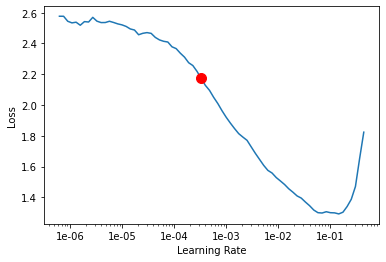

In [16]:
with neptune.create_experiment():
  learn.lr_find() # find optimal lr
  learn.recorder.plot(suggestion=True)

In [17]:
with neptune.create_experiment():  
  learn.fit_one_cycle(5, 1e-3) # fit to our data

https://ui.neptune.ai/spregler/fastai/e/FAS-88


epoch,train_loss,valid_loss,accuracy,error_rate,auc_healthy,auc_multiple_diseases,auc_rust,auc_scab,Mean AUC,time
0,1.473808,0.415824,0.857143,0.142857,0.984583,0.815029,0.980362,0.977158,0.939283,01:14
1,0.882371,0.333575,0.898352,0.101648,0.991402,0.910886,0.991086,0.990396,0.970943,01:14
2,0.644959,0.255750,0.914835,0.085165,0.991856,0.932884,0.995014,0.988962,0.977179,01:13
3,0.512146,0.217495,0.934066,0.065934,0.994394,0.953597,0.997165,0.991863,0.984255,01:14
4,0.437797,0.228511,0.931319,0.068681,0.994091,0.949261,0.997712,0.991397,0.983115,01:14


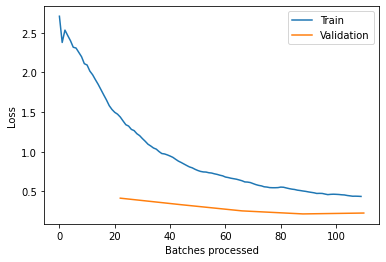

In [18]:
learn.recorder.plot_losses()

In [0]:
learn.save('resnet152-stage1')
learn.unfreeze()

https://ui.neptune.ai/spregler/fastai/e/FAS-89


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-05
Min loss divided by 10: 6.31E-08


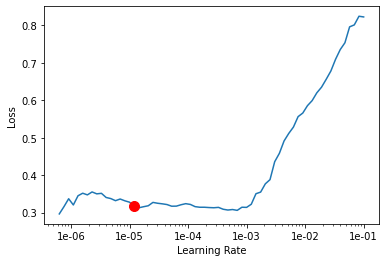

In [20]:
with neptune.create_experiment():
  learn.lr_find() # find optimal lr
  learn.recorder.plot(suggestion=True)

In [21]:
with neptune.create_experiment():
  learn.fit_one_cycle(15,slice(1e-05, 1e-03) )

https://ui.neptune.ai/spregler/fastai/e/FAS-90


epoch,train_loss,valid_loss,accuracy,error_rate,auc_healthy,auc_multiple_diseases,auc_rust,auc_scab,Mean AUC,time
0,0.290025,0.195073,0.939560,0.060440,0.996023,0.969011,0.998122,0.993397,0.989138,01:15
1,0.291630,0.198985,0.936813,0.063187,0.995265,0.983301,0.998156,0.992530,0.992313,01:14
2,0.261226,0.336214,0.912088,0.087912,0.988523,0.972543,0.997302,0.982193,0.985140,01:14
3,0.252579,0.209720,0.945055,0.054945,0.996705,0.983462,0.997507,0.991330,0.992251,01:15
4,0.243383,0.221482,0.934066,0.065934,0.993333,0.993577,0.998292,0.994198,0.994850,01:15
5,0.244206,0.237315,0.953297,0.046703,0.993144,0.972543,0.998463,0.990329,0.988620,01:15
6,0.215025,0.284244,0.925824,0.074176,0.986970,0.966924,0.998019,0.988929,0.985210,01:15
7,0.205162,0.156250,0.958791,0.041209,0.997197,0.979127,0.999761,0.994965,0.992762,01:15
8,0.195860,0.223917,0.953297,0.046703,0.990795,0.973507,0.999522,0.987162,0.987746,01:15
9,0.167030,0.157487,0.958791,0.041209,0.995417,0.979929,0.999522,0.994331,0.992300,01:14


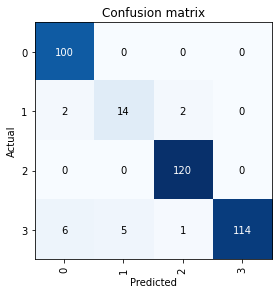

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
learn.save('resnet-stage2')
learn.load('resnet-stage2')
learn.export()

In [0]:
learn = load_learner(root_dir, test=test_data).to_fp32()

In [82]:
preds, y = learn.get_preds(DatasetType.Test)

In [84]:
preds_np = preds.numpy()
pred_df = pd.DataFrame(preds_np)
pred_df.shape

(1821, 4)

In [0]:
sample_df = pd.read_csv(root_dir/'sample_submission.csv')
sample_df.iloc[:,1:] = preds.numpy()
sample_df.to_csv('submission.csv', index=False)